# Preprocessing

In [47]:
import pandas as pd
from matplotlib import pyplot as plt
from glob import glob
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## CS vs. other majors

In [ ]:
unis           = pd.read_csv('../../data/IPEDS/university_info/hd2020.csv', encoding='cp1252')
fnames         = glob('../../data/IPEDS/*_A/*_rv.csv')+glob('../../data/IPEDS/*_a.csv')
fnames         = [fname for fname in fnames if ('2000' not in fname) and ('2001' not in fname)]
dfs            = [pd.read_csv(fname, index_col=0) for fname in fnames]
dfs            = [df.rename(columns={col: col.upper().strip() for col in df.columns}) for df in dfs]
dfs            = [df[df['AWLEVEL']==5] for df in dfs]
cs_maps        = [df['CIPCODE'].apply(lambda x: (x>=11) & (x<12)) for df in dfs]
cs_maps        = [cs_map.rename('CS') for cs_map in cs_maps] 
cs_and_noncs   = [df.groupby([cs_maps[i], df.index]).sum().reset_index() for i, df in enumerate(dfs)]
years          = [int(fname.split('/')[-1].split('_')[0][1:]) for fname in fnames]
cs_and_noncs   = sorted(zip(years, cs_and_noncs), key=lambda x: x[0])

## Compute Absolute Counts

In [40]:
var, var_alt   = 'CTOTALW', 'CRACE16' 
women_abs      = [df.groupby('CS').apply(lambda x: x[var].sum() if var in df.columns else x[var_alt].sum()) for year, df in cs_and_noncs]
women_abs      = pd.concat(women_abs, axis=1).transpose()

var, var_alt   = 'CBKAAT', 'CRACE18' 
black_abs      = [df.groupby('CS').apply(lambda x: x[var].sum() if var in df.columns else x[var_alt].sum()) for year, df in cs_and_noncs]
black_abs      = pd.concat(black_abs, axis=1).transpose()

var, var_alt   = 'CHISPT', 'CRACE21'
hispanic_abs   = [df.groupby('CS').apply(lambda x: x[var].sum() if var in df.columns else x[var_alt].sum()) for year, df in cs_and_noncs]
hispanic_abs   = pd.concat(hispanic_abs, axis=1).transpose()

var, var_alt   = 'CAIANT', 'CRACE19'
natives_abs    = [df.groupby('CS').apply(lambda x: x[var].sum() if var in df.columns else x[var_alt].sum()) for year, df in cs_and_noncs]
natives_abs    = pd.concat(natives_abs, axis=1).transpose()

women_abs    = women_abs[9:]
black_abs    = black_abs[9:]
hispanic_abs = hispanic_abs[9:]

## Compute Percentages

In [ ]:
var, var_alt   = 'CTOTALW', 'CRACE16' 
women_pct      = [df.groupby('CS').apply(lambda x:\
                       (x[var].sum()/x['CTOTALT'].sum())      if var in df.columns       else\
                        x[var_alt].sum()/x['CRACE24'].sum()   if 'CRACE24' in df.columns else\
                        x[var_alt].sum()/(x['CRACE15']+x['CRACE16']).sum())\
                    for _, df in cs_and_noncs]


var, var_alt   = 'CBKAAT', 'CRACE18' 
black_pct      = [df.groupby('CS').apply(lambda x:\
                       (x[var].sum()/x['CTOTALT'].sum())       if var in df.columns       else\
                        x[var_alt].sum()/x['CRACE24'].sum()    if 'CRACE24' in df.columns else\
                        x[var_alt].sum()/(x['CRACE15']+x['CRACE16']).sum())\
                    for _, df in cs_and_noncs]


var, var_alt   = 'CHISPT', 'CRACE21'
hispanic_pct      = [df.groupby('CS').apply(lambda x:\
                       (x[var].sum()/x['CTOTALT'].sum())       if var in df.columns       else\
                        x[var_alt].sum()/x['CRACE24'].sum()    if 'CRACE24' in df.columns else\
                        x[var_alt].sum()/(x['CRACE15']+x['CRACE16']).sum())\
                    for _, df in cs_and_noncs]


var, var_alt   = 'CAIANT', 'CRACE19'
natives_pct      = [df.groupby('CS').apply(lambda x:\
                       (x[var].sum()/x['CTOTALT'].sum())       if var in df.columns       else\
                        x[var_alt].sum()/x['CRACE24'].sum()    if 'CRACE24' in df.columns else\
                        x[var_alt].sum()/(x['CRACE15']+x['CRACE16']).sum())\
                    for _, df in cs_and_noncs]

women_pct      = pd.concat(women_pct, axis=1).transpose()[9:]
black_pct      = pd.concat(black_pct, axis=1).transpose()[9:]
hispanic_pct   = pd.concat(hispanic_pct, axis=1).transpose()[9:]
natives_pct    = pd.concat(natives_pct, axis=1).transpose()[9:]

## Plot absolute counts and percentages

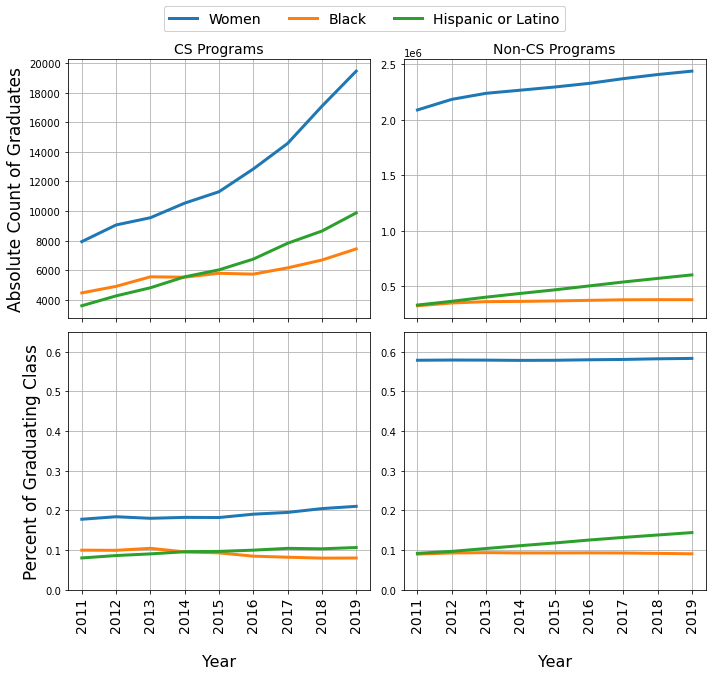

In [75]:
fig, axs       = plt.subplots(2, 2, figsize=(10,9), sharex=True)

_ = [axs[0][0].plot(df, linewidth=3) for df in [women_abs[True], black_abs[True], hispanic_abs[True]]]
# axs[0][0].set_xticks(range(9, 18), range(2011, 2020), rotation=90, fontsize=14);
axs[0][0].set_title('CS Programs', color='black', fontsize=14);

_ = [axs[0][1].plot(df, linewidth=3) for df in [women_abs[False], black_abs[False], hispanic_abs[False]]]
# axs[0][1].set_xticks(range(9, 18), range(2011, 2020), rotation=90, fontsize=14);
axs[0][1].set_title('Non-CS Programs', color='black', fontsize=14);

fig.legend(['Women', 'Black', 'Hispanic or Latino'], ncol=4, fontsize=14, bbox_to_anchor=(0.8, 1.05))

axs[0][0].set_ylabel('Absolute Count of Graduates', color='black', fontsize=17);
# axs[0][0].set_xlabel('\nYear', color='black', fontsize=16);
# axs[0][1].set_xlabel('\nYear', color='black', fontsize=16);

axs[0][0].grid();
axs[0][1].grid();

# fig, axs       = plt.subplots(1, 2, figsize=(10,5))

axs[1][0].plot(women_pct[True], linewidth=3)
axs[1][0].plot(black_pct[True], linewidth=3)
axs[1][0].plot(hispanic_pct[True], linewidth=3)
# axs[0].set_xticks(range(len(years)), sorted(years), rotation=90);
# axs[1][0].set_title('CS Programs', color='black', fontsize=14);
# axs[0].legend(['Women', 'Black', 'Hispanic', 'Native American']);

axs[1][1].plot(women_pct[False], linewidth=3)
axs[1][1].plot(black_pct[False], linewidth=3)
axs[1][1].plot(hispanic_pct[False], linewidth=3)
# axs[1].set_xticks(range(len(years)), sorted(years), rotation=90);
# axs[1][1].set_title('Non-CS Programs', color='black', fontsize=14);
# axs[1].legend(['Women', 'Black', 'Hispanic', 'Native American']);

axs[1][0].set_xticks(range(9, 18), range(2011, 2020), rotation=90, fontsize=14);
axs[1][1].set_xticks(range(9, 18), range(2011, 2020), rotation=90, fontsize=14);
axs[1][0].grid();
axs[1][1].grid();
fig.legend(['Women', 'Black', 'Hispanic or Latino'], ncol=4, fontsize=14, bbox_to_anchor=(0.8, 1.05))

axs[1][0].set_ylabel('Percent of Graduating Class', color='black', fontsize=17);
axs[1][0].set_xlabel('\nYear', color='black', fontsize=16);
axs[1][1].set_xlabel('\nYear', color='black', fontsize=16);

axs[1][0].set_ylim(0, 0.65);
axs[1][1].set_ylim(0, 0.65);

plt.tight_layout();